# Proyek Image Classification
- **Nama:** Rasyid Naufal
- **Email:** rasyidnaufalsaputra03@gmail.com
- **ID Dicoding:** rasyidnfl

# Library

In [1]:
!pip install split_folders

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import splitfolders
import os
import random
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

# Dataset

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2025-05-19 04:47:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 20.60.139.65
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|20.60.139.65|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2025-05-19 04:47:18 ERROR 404: The specified resource does not exist..



# Ekstrak Dataset


In [4]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_path = '/tmp/rockpaperscissors'

for root, dirs, files in os.walk(base_path):
    print(f"\n📁 Folder: {root}")
    for file in files[:5]:
        print(f"   📄 {file}")



📁 Folder: /tmp/rockpaperscissors
   📄 README_rpc-cv-images.txt

📁 Folder: /tmp/rockpaperscissors/rps-cv-images
   📄 README_rpc-cv-images.txt

📁 Folder: /tmp/rockpaperscissors/rps-cv-images/paper
   📄 b15QGB4XPECDemV5.png
   📄 8vCpdCGSnX8CopJJ.png
   📄 y9DoLrI4Hlh2EUts.png
   📄 fPwDPzGZ5JeY0rb9.png
   📄 9Dto1OCNf5wjYimE.png

📁 Folder: /tmp/rockpaperscissors/rps-cv-images/scissors
   📄 bzQcSRVP3M7abinD.png
   📄 Tghe750qrbh7MMpP.png
   📄 xfdYfkrgEZ2fuuck.png
   📄 uMy6gyGTY6epng27.png
   📄 sYwtAuLI5zLIEfJI.png

📁 Folder: /tmp/rockpaperscissors/rps-cv-images/rock
   📄 NSlKVMz6GymflBze.png
   📄 6AcmgOHcOvQfp1iW.png
   📄 RkKc61MLjm4clTPg.png
   📄 qiysAN26ClLYOZfG.png
   📄 7Dh4gBDJVdP9tTLr.png

📁 Folder: /tmp/rockpaperscissors/paper
   📄 b15QGB4XPECDemV5.png
   📄 8vCpdCGSnX8CopJJ.png
   📄 y9DoLrI4Hlh2EUts.png
   📄 fPwDPzGZ5JeY0rb9.png
   📄 9Dto1OCNf5wjYimE.png

📁 Folder: /tmp/rockpaperscissors/scissors
   📄 bzQcSRVP3M7abinD.png
   📄 Tghe750qrbh7MMpP.png
   📄 xfdYfkrgEZ2fuuck.png
   📄 uMy6gyGT

In [6]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

for label in ['rock', 'paper', 'scissors']:
    folder = os.path.join(base_dir, label)
    print(f"{label}: {len(os.listdir(folder))} gambar")

rock: 726 gambar
paper: 712 gambar
scissors: 750 gambar


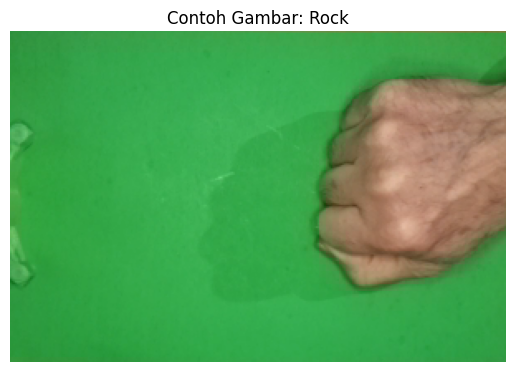

In [7]:
rock_path = '/tmp/rockpaperscissors/rps-cv-images/rock'
sample_image = random.choice(os.listdir(rock_path))

img = mpimg.imread(os.path.join(rock_path, sample_image))
plt.imshow(img)
plt.title("Contoh Gambar: Rock")
plt.axis('off')
plt.show()

# Split

In [8]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'


splitfolders.ratio(base_dir, output="/tmp/rockpaperscissors_split", seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:02, 963.89 files/s]


In [9]:
train_dir = '/tmp/rockpaperscissors_split/train'
validation_dir = '/tmp/rockpaperscissors_split/val'

In [10]:
!ls /tmp/rockpaperscissors_split

train  val


In [11]:
!ls /tmp/rockpaperscissors_split/train
!ls /tmp/rockpaperscissors_split/val

paper  rock  scissors
paper  rock  scissors


# Image Generator

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Build Model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Training Model

In [16]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.97:
            print("\nAkurasi di atas 97%, hentikan training!")
            self.model.stop_training = True

callbacks = MyCallback()

history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    callbacks=[callbacks]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.4092 - loss: 1.1439 - val_accuracy: 0.7625 - val_loss: 0.7475
Epoch 2/20
16/25 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7262 - loss: 0.6893

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7439 - loss: 0.6620 - val_accuracy: 0.7750 - val_loss: 0.5106
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8529 - loss: 0.4062 - val_accuracy: 0.9125 - val_loss: 0.2285
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9241 - loss: 0.2113 - val_accuracy: 0.9250 - val_loss: 0.2064
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9379 - loss: 0.2320 - val_accuracy: 0.8813 - val_loss: 0.2878
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9226 - loss: 0.2093 - val_accuracy: 0.9187 - val_loss: 0.2395
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9166 - loss: 0.2065 - val_accuracy: 0.9438 - val_loss: 0.1927
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9605 - loss: 0.1496 - val_accuracy: 0.9375 - val_loss: 0.2171
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9540 - loss: 0.1340 - val_accuracy: 0.9563 - val_loss: 0.1075
Epo

# Visualisasi

## Akurasi

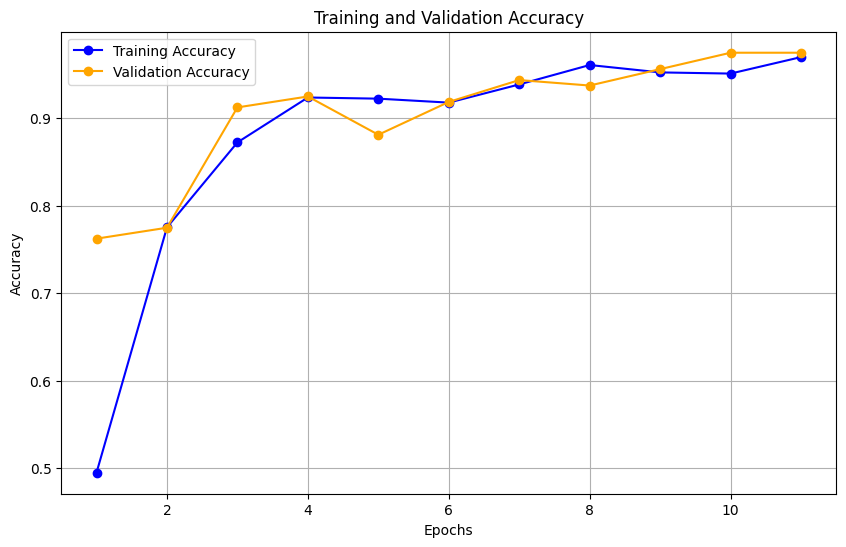

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))

plt.plot(epochs, acc, color='blue', marker='o', label='Training Accuracy')
plt.plot(epochs, val_acc, color='orange', marker='o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Loss

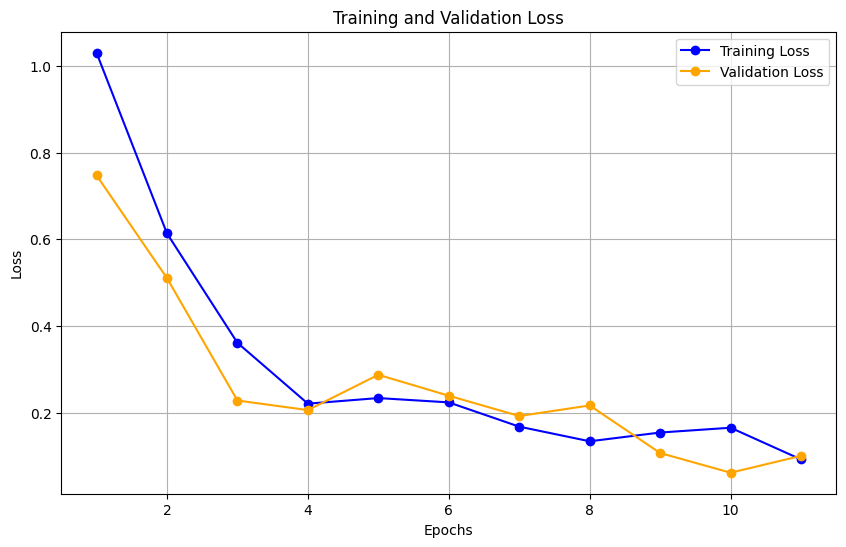

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))

plt.plot(epochs, loss, color='blue', marker='o', label='Training Loss')
plt.plot(epochs, val_loss, color='orange', marker='o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Inference

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png


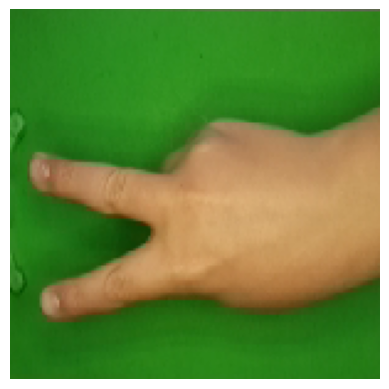

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Scissors


In [21]:
uploaded = files.upload()

for fn in uploaded.keys():
    img = image.load_img(fn, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    prediction = model.predict(x)

    kelas = np.argmax(prediction[0])
    if kelas == 0:
        print("Paper")
    elif kelas == 1:
        print("Rock")
    else:
        print("Scissors")